## MNIST Handwritten Digit Classification using Deep Learning

### Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

### Loading the MNIST data

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


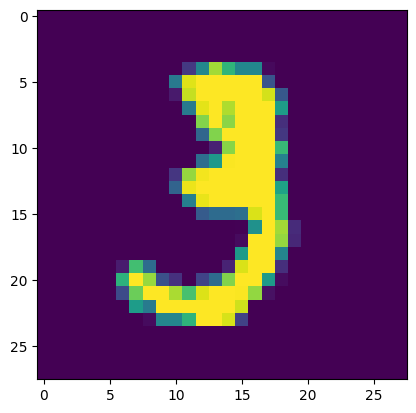

3


In [8]:
plt.imshow(X_train[10])
plt.show()

print(Y_train[10])

#### Image Labels

In [9]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
# Scale/Normalize the data
X_train = X_train/255
X_test = X_test/255

In [12]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

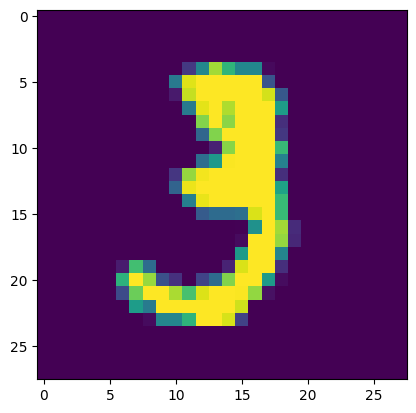

In [13]:
plt.imshow(X_train[10])
plt.show()

## Building Neural Network

In [14]:
# Set up layers of the Neural Network
model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50, activation='relu'), 
                        keras.layers.Dense(50, activation='relu'), 
                        keras.layers.Dense(10, activation='sigmoid')  
])

In [15]:
# Compile the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
# Train thee Neural Network
model.fit(X_train, Y_train, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3057 - accuracy: 0.9107
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1429 - accuracy: 0.9572
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1037 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0832 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0673 - accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0580 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0504 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0464 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.034

### Model Evaluation

In [18]:
loss, accuracy = model.evaluate(X_test, Y_test)   
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 0.9755
0.9754999876022339


In [19]:
print(X_test.shape)

(10000, 28, 28)


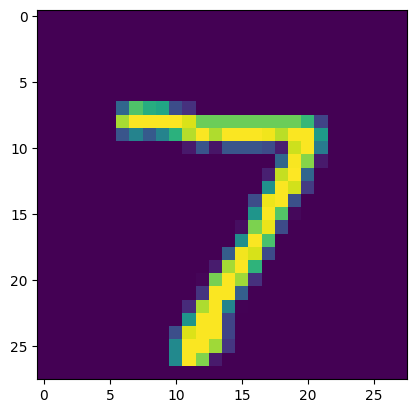

In [20]:
plt.imshow(X_test[0])
plt.show()

In [21]:
print(Y_test[0])

7


In [22]:
Y_pred = model.predict(X_test)  

313/313 [==============================] - 0s 973us/step


In [23]:
print(Y_pred.shape)

(10000, 10)


In [24]:
print(Y_pred[0])

[1.7500732e-02 1.3241709e-03 6.8752044e-01 9.8864126e-01 8.4081350e-08
 4.1185029e-02 6.8617145e-10 9.9999917e-01 3.2065952e-01 1.6818519e-01]


In [26]:
# Convert Prediction Probabilities to Class labels
label_test_image_1 = np.argmax(Y_pred[0])  
print(label_test_image_1)

7


In [27]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

### Confusion Matrix

In [29]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 959    0    2    1    1    9    4    0    3    1]
 [   0 1125    5    1    0    2    1    0    1    0]
 [   1    0 1015    3    1    0    1    5    6    0]
 [   0    0    3  979    0   18    0    4    3    3]
 [   0    1    8    0  965    0    1    2    0    5]
 [   3    0    0    3    1  873    5    1    5    1]
 [   3    3    2    1    2   13  931    0    3    0]
 [   0    5   11    3    1    2    0  996    6    4]
 [   2    1    4    7    2   11    1    2  944    0]
 [   2    2    1    6   13    3    0    6    8  968]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

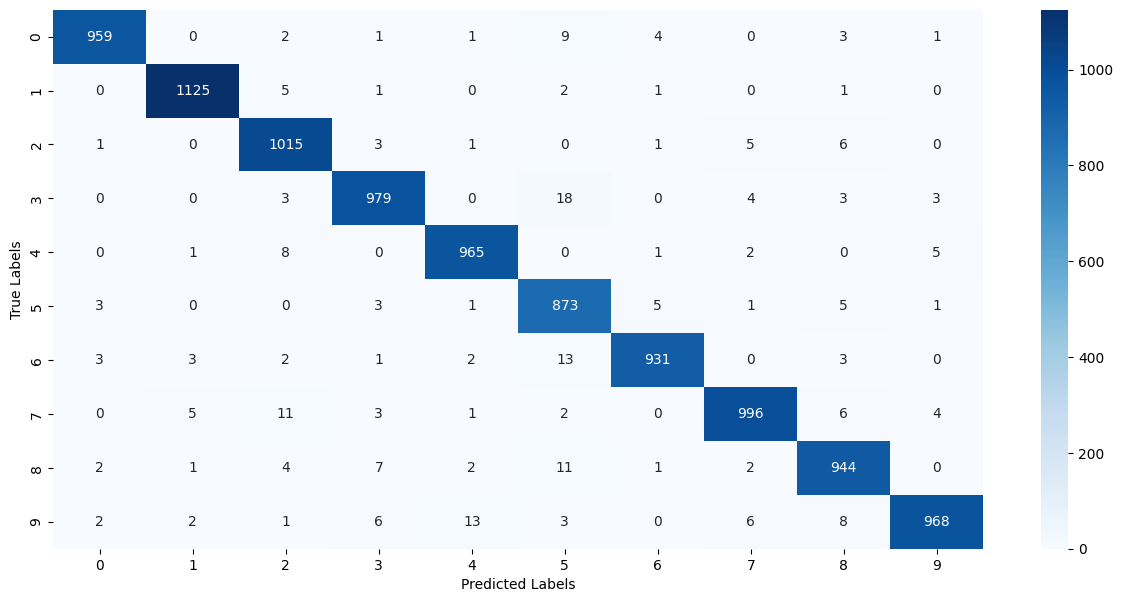

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues') 
plt.ylabel('True Labels'),
plt.xlabel('Predicted Labels')


## Building a Predicttive System

In [32]:
input_image_path = r'6.png'

input_image = cv2.imread(input_image_path)

In [33]:
type(input_image)

numpy.ndarray

In [34]:
input_image

array([[[17, 17, 17],
        [11, 11, 11],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [18, 18, 18],
        [55, 55, 55]],

       [[ 9,  9,  9],
        [ 3,  3,  3],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [11, 11, 11],
        [52, 52, 52]],

       [[ 8,  8,  8],
        [ 2,  2,  2],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [10, 10, 10],
        [51, 51, 51]],

       ...,

       [[ 8,  8,  8],
        [ 2,  2,  2],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [10, 10, 10],
        [51, 51, 51]],

       [[ 9,  9,  9],
        [ 3,  3,  3],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [11, 11, 11],
        [51, 51, 51]],

       [[ 9,  9,  9],
        [ 2,  2,  2],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [11, 11, 11],
        [51, 51, 51]]], dtype=uint8)

In [35]:
cv2.imshow('', input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
input_image.shape

(825, 829, 3)

In [38]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [39]:
grayscale.shape

(825, 829)

In [40]:
input_image_resized = cv2.resize(grayscale, (28,28))

In [41]:
input_image_resized.shape

(28, 28)

In [43]:
cv2.imshow('', input_image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
input_image_resized = input_image_resized/255

In [45]:
image_reshaped = np.reshape(input_image_resized, [1, 28, 28])    

In [46]:
input_pred = model.predict(image_reshaped)
print(input_pred)

1/1 [==============================] - 0s 17ms/step
[[7.2079253e-01 1.3115814e-02 8.9406902e-01 2.4906415e-02 3.3013371e-01
  2.0952919e-01 9.9989229e-01 9.3932293e-05 1.8814234e-01 6.0921842e-03]]


In [47]:
input_pred_label = np.argmax(input_pred)
print(input_pred_label)

6


## *Predictive System*

Path of the image to be predicted:  6.png


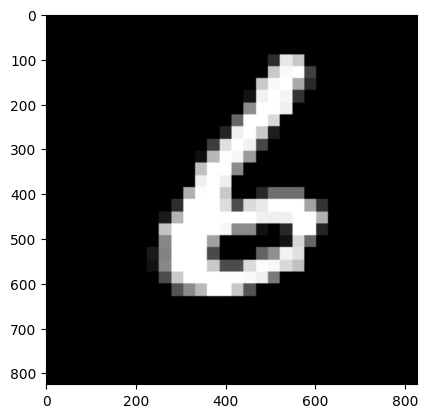

1/1 [==============================] - 0s 6ms/step
The Handwritten Digit is recognised as - 6


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)
plt.show()

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resized = cv2.resize(grayscale, (28,28))

input_image_resized = input_image_resized/255

image_reshaped = np.reshape(input_image_resized, [1, 28, 28])

input_pred = model.predict(image_reshaped)

input_pred_label = np.argmax(input_pred)

print('The Handwritten Digit is recognized as -', input_pred_label)